<a href="https://colab.research.google.com/github/dipteshgour-web/Seismic-Data-Generator/blob/main/seismicwavegenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 HGSM Task : Generating 2,000 Labelled Synthetic Traces...
✅ Task 1 Complete: 2,000 traces saved (Class 0 to 3).


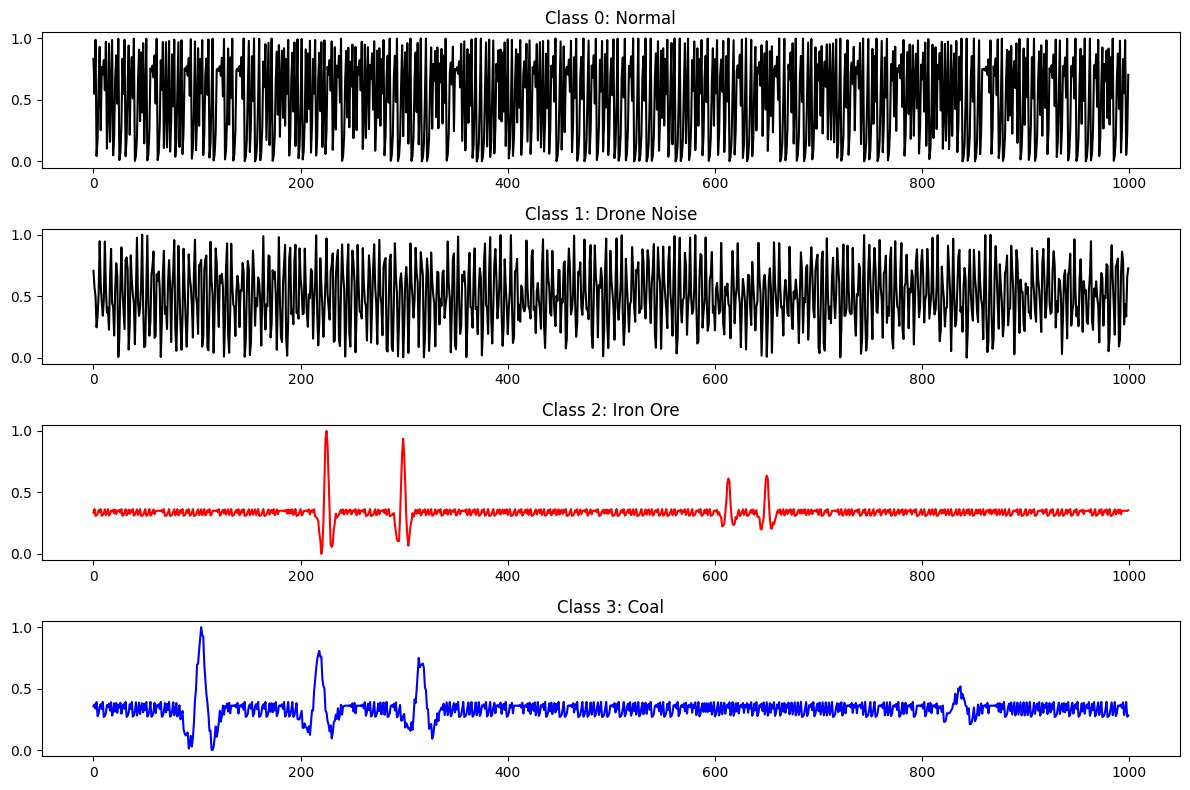

In [ ]:
!pip install numpy scipy matplotlib scikit-learn
import numpy as np
import matplotlib.pyplot as plt

NUM_SAMPLES = 2000
TRACE_LENGTH = 1000
SAMPLE_RATE = 0.002
CENTER_FREQ_IRON = 40
CENTER_FREQ_COAL = 18

print("🚀 HGSM Task : Generating 2,000 Labelled Synthetic Traces...")


def get_ricker_wavelet(freq, length=0.1, dt=0.002):
    t = np.arange(-length/2, length/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(freq**2)*(t**2)) * np.exp(-(np.pi**2)*(freq**2)*(t**2))
    return y


def get_reflectivity(length, mineral_type="none"):
    ref = np.zeros(length)
    if mineral_type == "none":
        return ref

    num_layers = np.random.randint(3, 6)
    indices = np.random.choice(range(100, length-100), num_layers, replace=False)

    if mineral_type == "iron":
        ref[indices] = np.random.uniform(0.7, 1.0, num_layers)
    elif mineral_type == "coal":
        ref[indices] = np.random.uniform(0.3, 0.5, num_layers)
    return ref

def apply_complex_noise(trace, is_drone=False):
    length = len(trace)
    t = np.linspace(0, 1, length)


    trace = trace * np.exp(-1.8 * t)


    chaos_vol = np.random.uniform(0.02, 0.08)
    x = np.random.rand()
    chaos = np.zeros(length)
    for i in range(length):
        x = 3.99 * x * (1 - x)
        chaos[i] = x
    chaos_noise = (chaos - 0.5) * chaos_vol


    drone_noise = np.zeros(length)
    if is_drone:
        drone_vol = np.random.uniform(0.12, 0.22)
        f_motor = np.random.uniform(195, 205)
        drone_noise = (0.25 * np.sin(2 * np.pi * f_motor * t)) * drone_vol

    return trace + chaos_noise + drone_noise


features = []
labels = []

wavelet_iron = get_ricker_wavelet(CENTER_FREQ_IRON)
wavelet_coal = get_ricker_wavelet(CENTER_FREQ_COAL)

for i in range(NUM_SAMPLES):

    if i < 400:
        raw = np.zeros(TRACE_LENGTH)
        processed = apply_complex_noise(raw, is_drone=False)
        label = 0


    elif i < 800:
        raw = np.zeros(TRACE_LENGTH)
        processed = apply_complex_noise(raw, is_drone=True)
        label = 1


    elif i < 1400:
        ref = get_reflectivity(TRACE_LENGTH, "iron")
        clean = np.convolve(ref, wavelet_iron, mode='same')
        processed = apply_complex_noise(clean, is_drone=False)
        label = 2


    else:
        ref = get_reflectivity(TRACE_LENGTH, "coal")
        clean = np.convolve(ref, wavelet_coal, mode='same')
        processed = apply_complex_noise(clean, is_drone=False)
        label = 3


    processed = (processed - np.min(processed)) / (np.max(processed) - np.min(processed))
    features.append(processed)
    labels.append(label)


np.save("features_hgsm_2000.npy", np.array(features))
np.save("labels_hgsm_2000.npy", np.array(labels))

print(f"✅ Task 1 Complete: 2,000 traces saved (Class 0 to 3).")


plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(4, 1, i+1)
    idx = [0, 400, 800, 1400][i]
    plt.plot(features[idx], color='red' if i==2 else ('blue' if i==3 else 'black'))
    plt.title(f"Class {i}: {['Normal', 'Drone Noise', 'Iron Ore', 'Coal'][i]}")
plt.tight_layout()
plt.show()